In [1]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.size'] = 12

In [2]:
url = 'https://www.shine.com/job-search/jobs?job_type=2&top_companies_boost=true&sort=1'

In [3]:
response = requests.get(url)

In [4]:
response

<Response [200]>

In [5]:
soup = BeautifulSoup(response.text,'html.parser')

In [6]:
html = soup.find_all('div')

## Fetching Firm Name

In [7]:
req = soup.select('div h2[itemprop="name"]')

In [8]:
titles = [r.text for r in req]

In [9]:
titles

[' | Urgently Required | Team Leader | For Noida/Delhi | ',
 'Front Line Executive',
 'Front Line Executive',
 'Mba Hr Fresher',
 'Credit Card Sales Executive MUST NEED 1 YRS OF EXP  fro ...',
 'Wanted Freshers for Java Developer',
 'Key Account Manager-Corporate Salary',
 'Bpo Executive',
 'Sales Officer',
 'Hr Recruiter',
 'Walk-in Interview at Kotak Mahindra Bank for Relationsh ...',
 'Non It Recruiter',
 'Key Account Manager-Corporate Salary',
 'GM/RM/BM/BDM (SALES) - BFSI',
 'Backend Executive',
 'Hiring for HR Manager in Thane location.',
 'Require HR Recruiter at Bhayandar Mumbai',
 'Telesales / Telemarketing Executive',
 'Sales Executive',
 'Javascript Developer']

In [10]:
titles1 = [t.replace("|","") for t in titles]

In [11]:
titles = [t.replace("  ", "") for t in titles1]

## Fetching Firm Name

In [12]:
orgs = soup.find_all('div', class_='jobCard_jobCard_cName__mYnow')

In [13]:
orgs1 = [o.text for o in orgs]

In [14]:
sub_str = "Hiring"
companies = [o.split(sub_str)[0] for o in orgs1]

## Fetching Locations

In [15]:
loc = soup.find_all('div', class_='jobCard_jobCard_lists__fdnsc')

In [16]:
loc1 = [l.div.text for l in loc]

In [17]:
loc2 = [l.replace("+", ",") for l in loc1]

In [18]:
pattern  = r'[0-9]'
strpattern = r'[a-z]'

In [19]:
location = [re.sub(pattern, '', l) for l in loc2]

## Fetching Experience

In [20]:
experience = [l.find_all('div')[-1].text for l in loc]

## Fetching Positions

In [21]:
vacancies = soup.find_all('ul', class_='jobCard_jobCard_jobDetail__jD82J')

In [22]:
vac = [v.text.split("Positions")[0][-3:] for v in vacancies ]
vac = [v.replace('lar', '1') for v in vac]
vac = [re.sub(strpattern, '', l) for l in vac]

In [23]:
vacancies= [v.replace(' ','') for v in vac]

## Converting to DataFrame

In [24]:
df = pd.DataFrame({'Titles':titles, 'Firm Name': companies, 'Job Location':location, 'Experience':experience, 'Positions': vacancies})

In [25]:
df.head()

,Titles,Firm Name,Job Location,Experience,Positions
0,Urgently RequiredTeam LeaderFor Noida/Delhi,JS Consultancy Services,"Noida,Ghaziabad, Gurugram, Delhi",0 to 5 Yrs,99
1,Front Line Executive,BHARTI HR CLEANER WALA ZEEVIKA JOB...,"Faizabad,Lucknow",0 to 1 Yr,40
2,Front Line Executive,BHARTI HR CLEANER WALA ZEEVIKA JOB...,Faizabad,0 to 1 Yr,40
3,Mba Hr Fresher,SBL IT SOLUTIONS.,Chennai,0 Yrs,12
4,Credit Card Sales Executive MUST NEED 1 YRS OF...,Nusratbanu Kadir Sheikh,Mumbai City,1 to 6 Yrs,2


In [26]:
df['Titles'].duplicated()

0     False
1     False
2      True
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12     True
13    False
14    False
15    False
16    False
17    False
18    False
19    False
Name: Titles, dtype: bool

## Dropping Duplicates

In [27]:
df = df.drop_duplicates(subset=['Titles'])

In [28]:
df.head()

,Titles,Firm Name,Job Location,Experience,Positions
0,Urgently RequiredTeam LeaderFor Noida/Delhi,JS Consultancy Services,"Noida,Ghaziabad, Gurugram, Delhi",0 to 5 Yrs,99
1,Front Line Executive,BHARTI HR CLEANER WALA ZEEVIKA JOB...,"Faizabad,Lucknow",0 to 1 Yr,40
3,Mba Hr Fresher,SBL IT SOLUTIONS.,Chennai,0 Yrs,12
4,Credit Card Sales Executive MUST NEED 1 YRS OF...,Nusratbanu Kadir Sheikh,Mumbai City,1 to 6 Yrs,2
5,Wanted Freshers for Java Developer,SBL IT SOLUTIONS.,Chennai,0 Yrs,6


In [29]:
#Changing Dtype
df['Positions'] = df['Positions'].astype('int32')
#Creating a New Column
numpattern = r'[0]'
df['Category'] = ['Fresher' if '0' in i else 'Experienced' for i in df['Experience']]

In [30]:
#DataFrame created based on Descending values 
df.sort_values(by='Positions', ascending=False)

,Titles,Firm Name,Job Location,Experience,Positions,Category
0,Urgently RequiredTeam LeaderFor Noida/Delhi,JS Consultancy Services,"Noida,Ghaziabad, Gurugram, Delhi",0 to 5 Yrs,99,Fresher
16,Require HR Recruiter at Bhayandar Mumbai,Work Force HR,Mumbai City,0 to 5 Yrs,99,Fresher
14,Backend Executive,Bright Info Solution,Hyderabad,0 to 2 Yrs,99,Fresher
6,Key Account Manager-Corporate Salary,Prov HR Solutions Private Limited H...,Chennai,3 to 5 Yrs,50,Experienced
1,Front Line Executive,BHARTI HR CLEANER WALA ZEEVIKA JOB...,"Faizabad,Lucknow",0 to 1 Yr,40,Fresher
17,Telesales / Telemarketing Executive,LEARN N EARN,Surat,0 to 1 Yr,30,Fresher
8,Sales Officer,Rekrut India Private Limited,"Bangalore,Shimoga, Belgaum, Hubli, Mysore",0 to 4 Yrs,30,Fresher
13,GM/RM/BM/BDM (SALES) - BFSI,CS SIGARAM CHITS PVT LTD,"Chennai,Kumbakonam",1 to 6 Yrs,20,Experienced
18,Sales Executive,TRUHOMES REALTY,Noida,0 to 1 Yr,15,Fresher
3,Mba Hr Fresher,SBL IT SOLUTIONS.,Chennai,0 Yrs,12,Fresher


## Visualizing Data

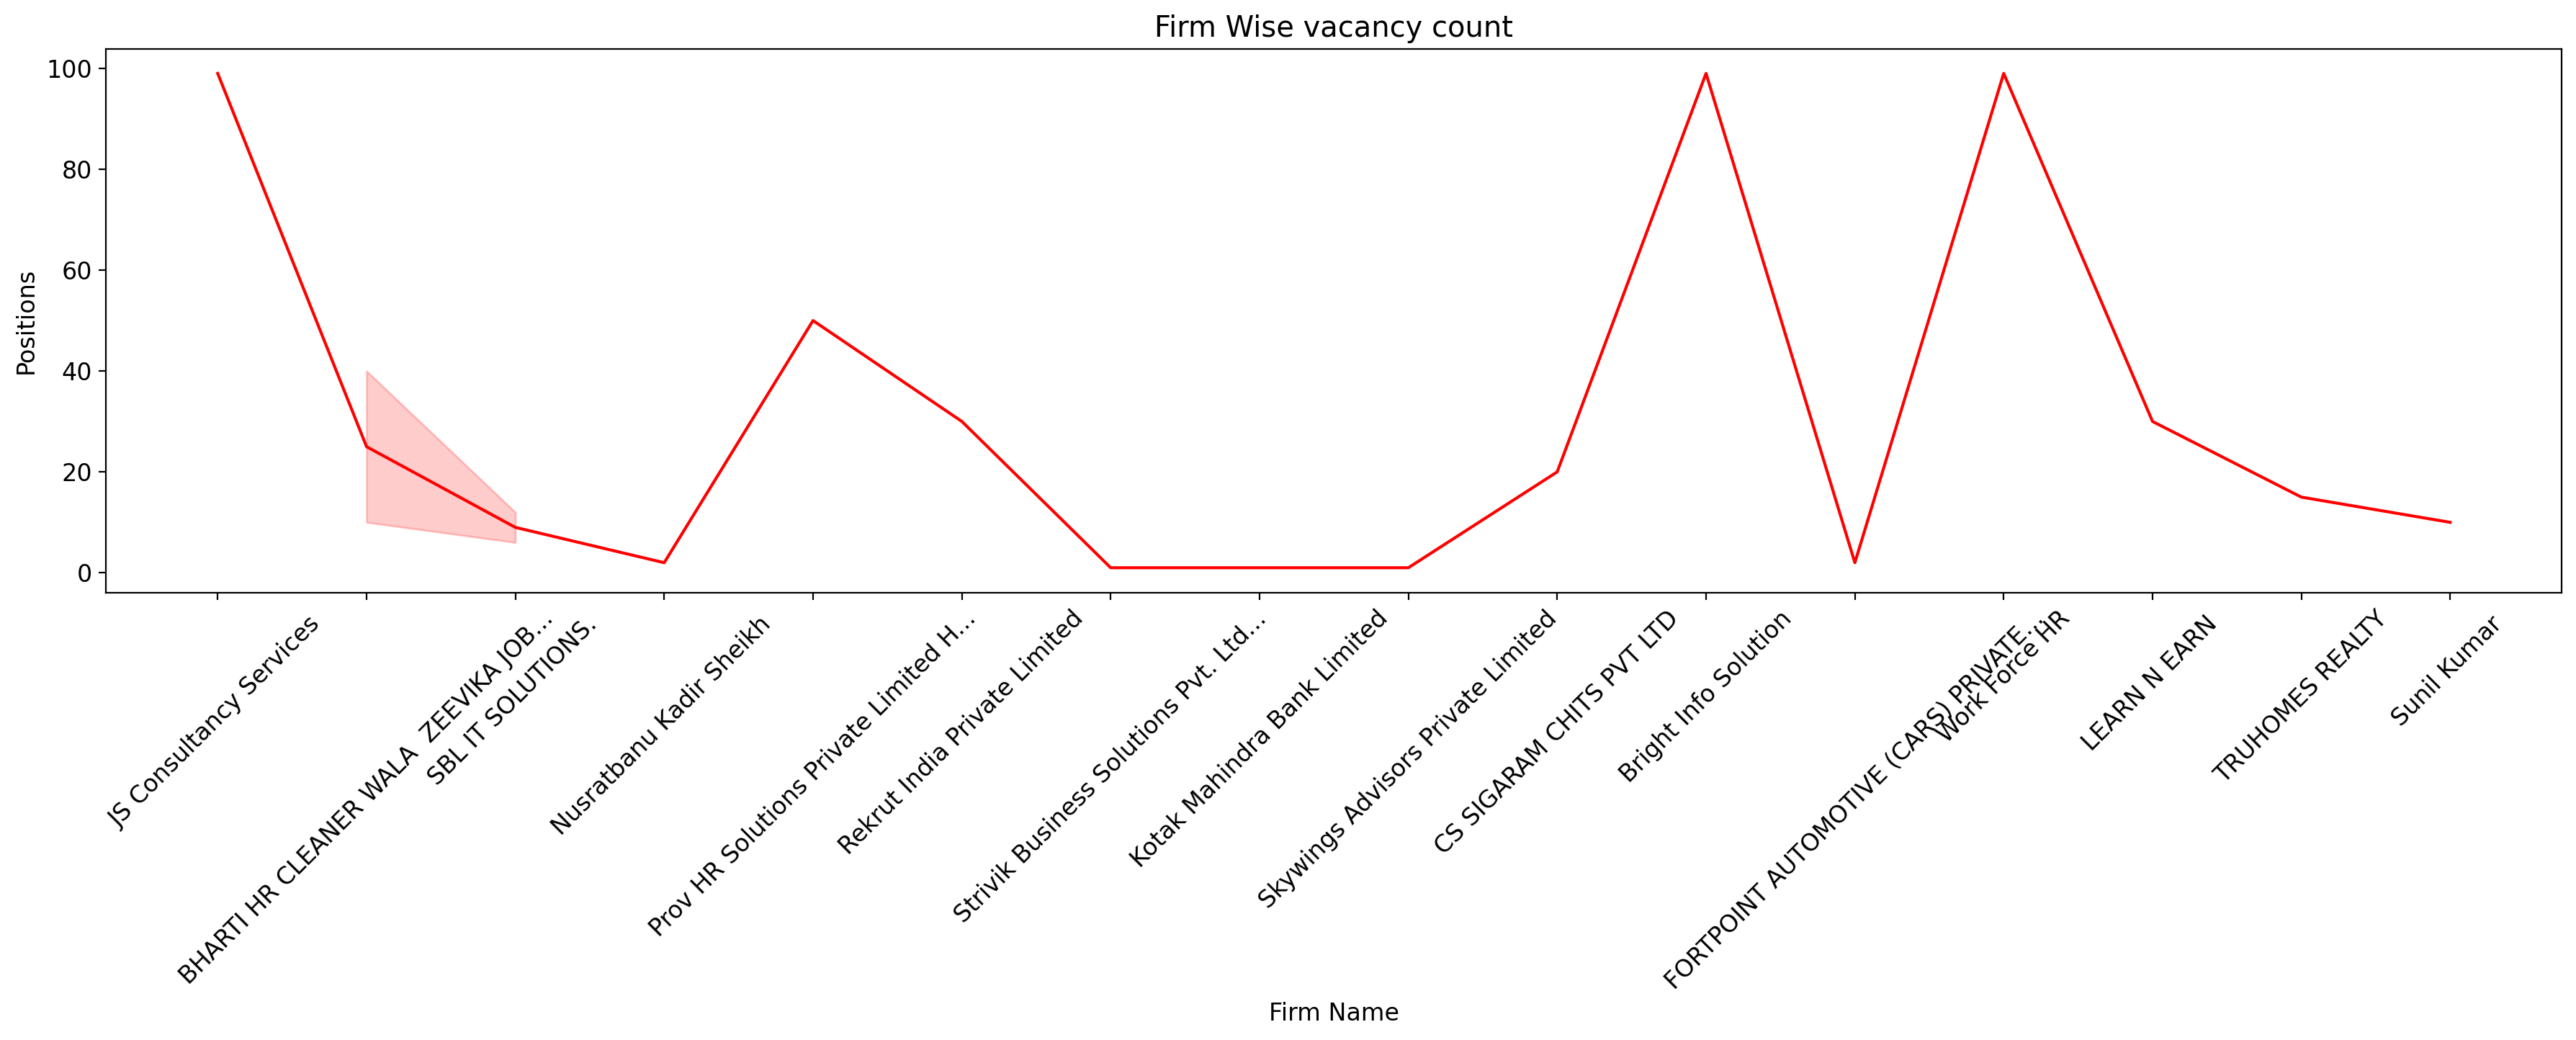

In [31]:
plt.figure(figsize=(22,5), dpi=200)
sns.lineplot(x=df['Firm Name'], y=df['Positions'], markers=True, color='red')
plt.title('Firm Wise vacancy count')
plt.xticks(rotation=45)
plt.show()

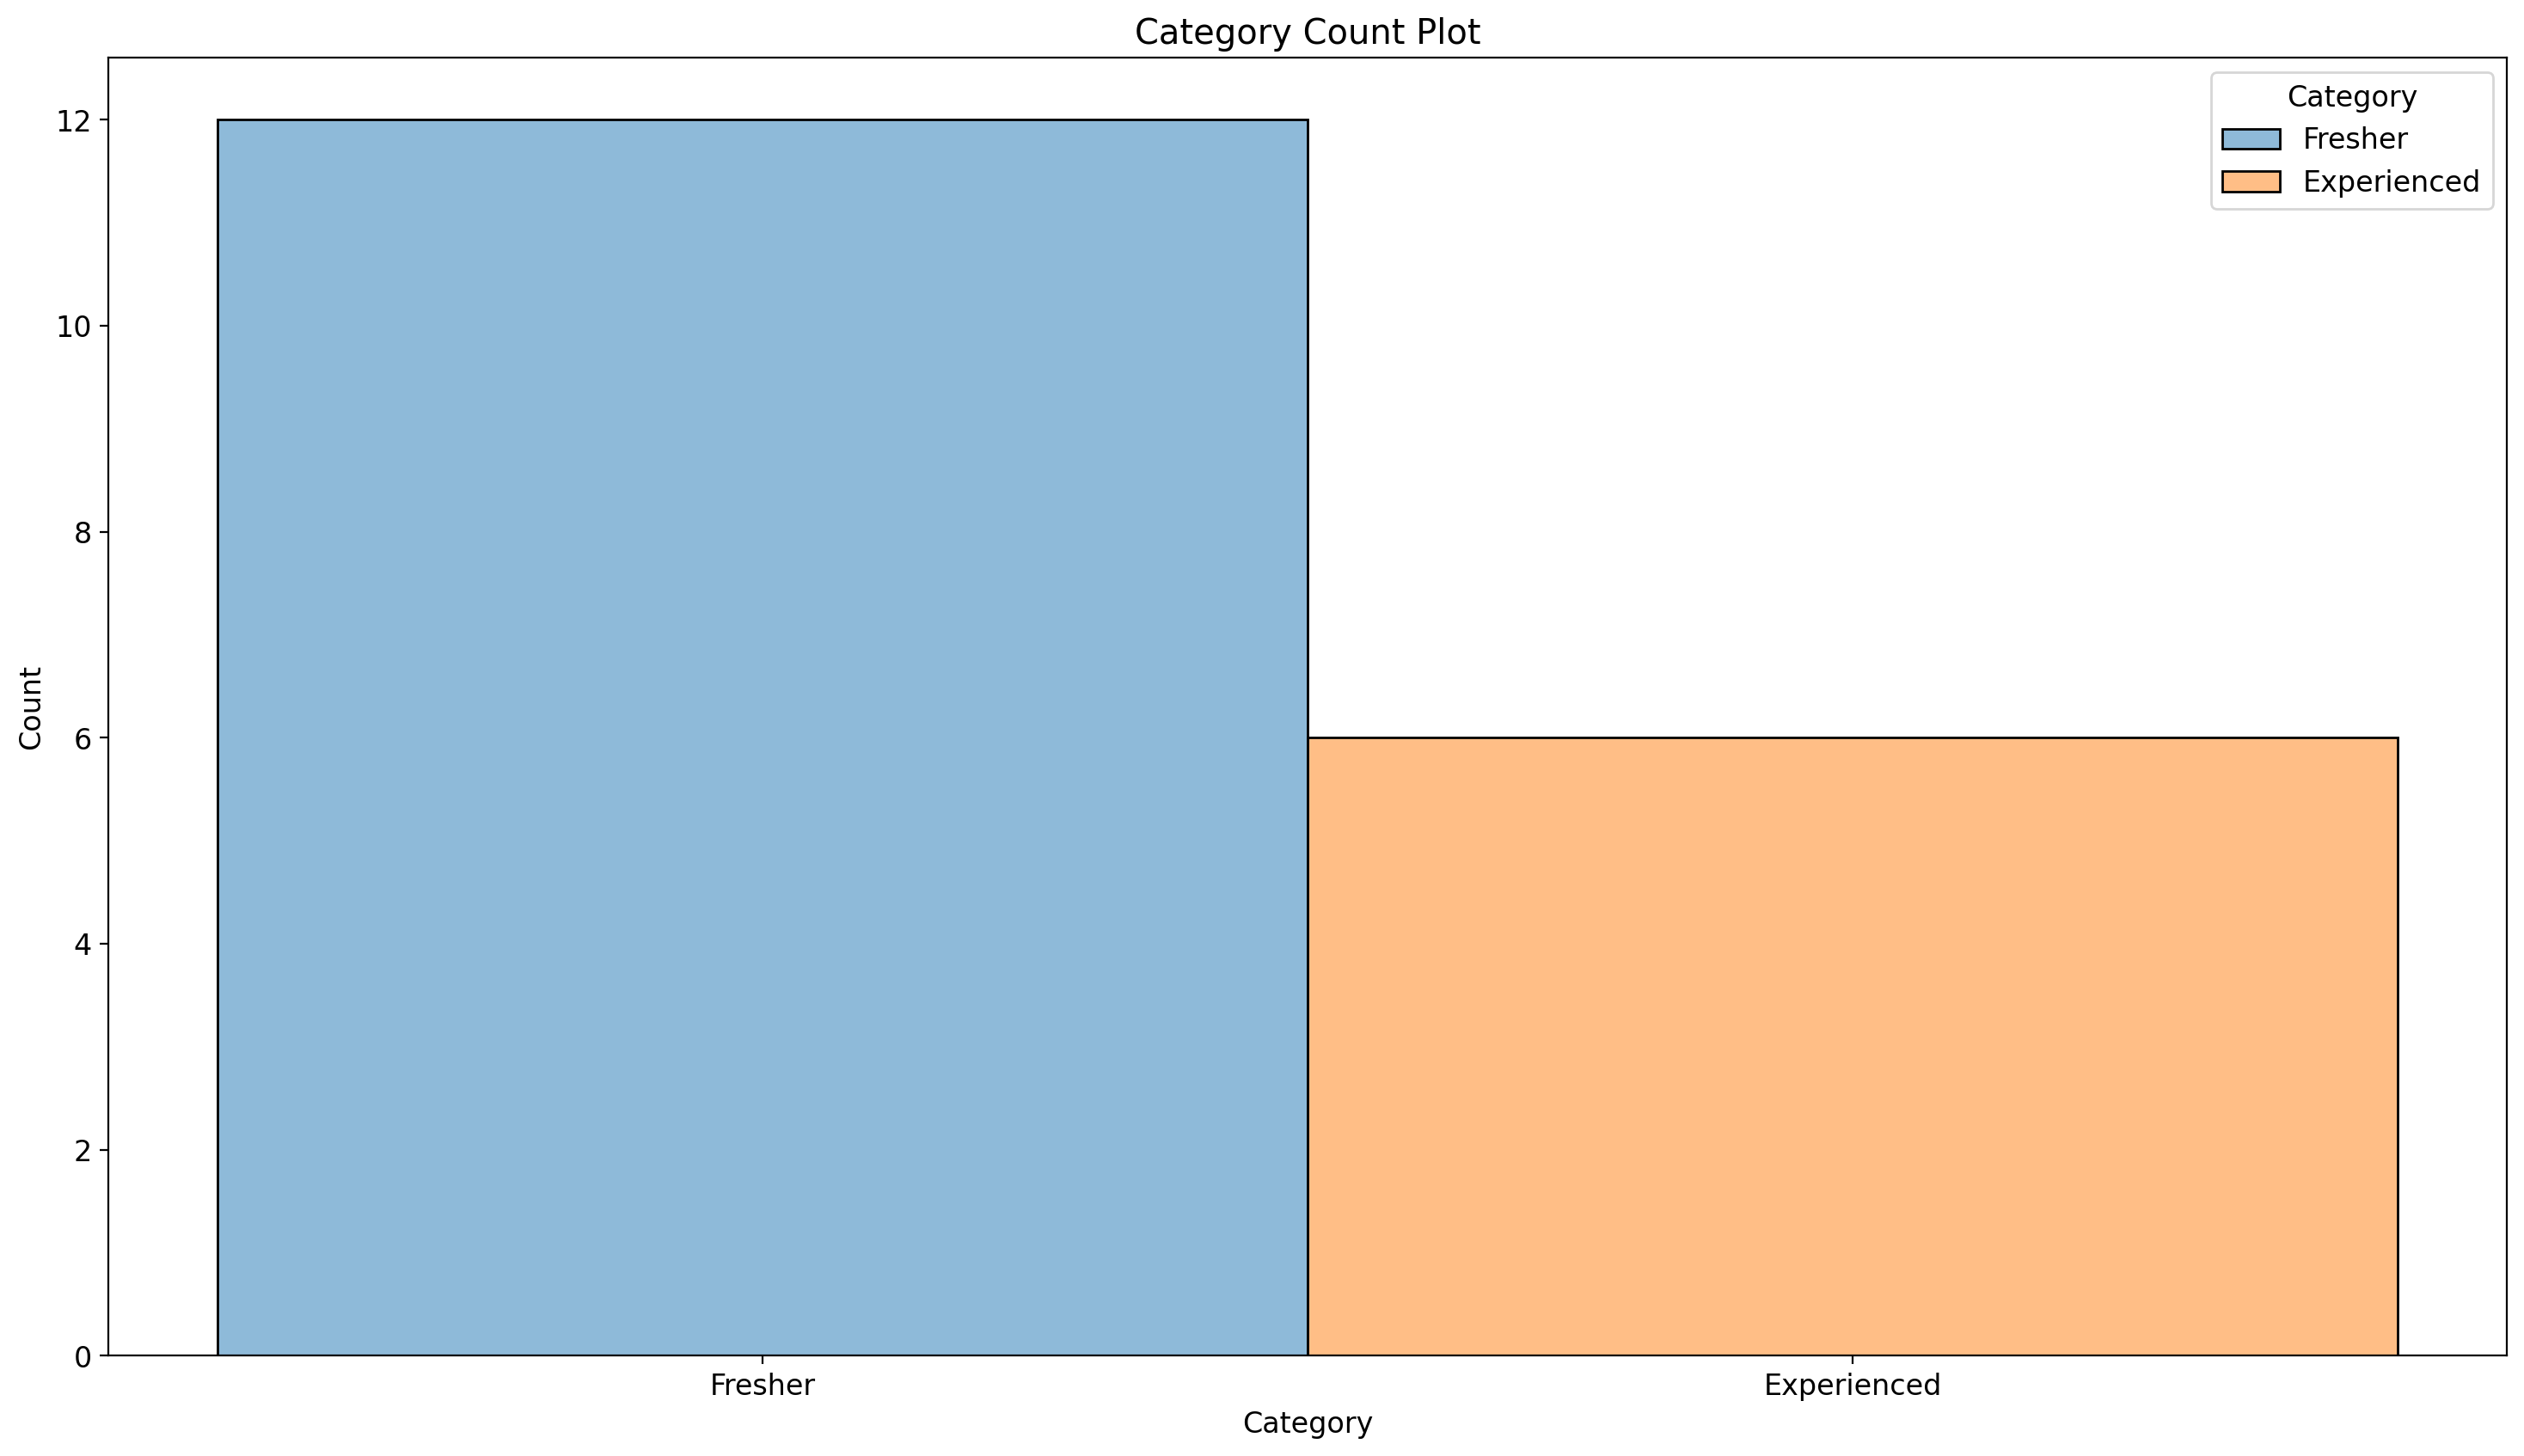

In [32]:
plt.figure(figsize=(18,10), dpi=200)
sns.histplot(data =df,x=df['Category'], hue=df['Category'])
plt.title('Category Count Plot')
plt.show()